In [ ]:
#%pip install networkx

# Исследование корреляций между различными свойствами и характеристиками графов. Вывод формулы Эйлера.

В рамках альтернативного экзамена необходимо выполнить следующее:
1) Разработать генератор графов (для генерации синтетических данных для дальнейшего изучения)
2) Выполнить кластеризацию сгенерированных данных, в качестве признаков использовать модули (программные алгоритмы, находящие какое-либо свойство или характеристику графа), которые участвуют в формулей Эйлера, а также те, которые в ней не участвуют.
   
   Вместо кластеризации была построена модель линейной регрессии, так как задача кластеризации не является корректной из-за того, что неизвестно количество кластеров, а также неизвестно, какие объекты принадлежат к каким кластерам. 

3) Исследовать связь между различными признаками, которые участвовали в построении модели линейной регрессии.

Постановщик задачи: [Зайков Дмитрий](https://github.com/Terross/wise-task-research)


Работа выполнена в файле `main.ipynb`, ссылка в [colab](https://colab.research.google.com/github/Fel1-of/wise-task-research/blob/pytuhon/main.ipynb) посмотреть. Чтобы самостоятельно запустить код, необходимо склонируйте репозиторий и установить библиотеку `networkx` и стандартный пакет по анализу данных (`jupiter notebook`, `numpy`, `pandas`, `matplotlib`, `seaborn`, `tqdm`).

В работе исследуются корреляции между различными свойствами и характеристиками графов. В качестве данных используются графы и методы из библиотеки `networkx`.


## Методы для работы с графами:
 - nx.Graph(): Создает пустой граф.
 - G.add_node(node): Добавляет одну вершину в граф.
 - G.add_nodes_from(nodes): Добавляет несколько вершин в граф.
 - G.add_edge(u, v): Добавляет ребро между вершинами u и v.
 - G.add_edges_from(edges): Добавляет несколько ребер в граф.
 - G.nodes(): Возвращает список всех вершин в графе.
 - G.edges(): Возвращает список всех ребер в графе.
 - G.degree(node): Возвращает степень вершины (количество ребер, соединенных с вершиной).
 - G.number_of_nodes(): Возвращает количество вершин в графе.
 - G.number_of_edges(): Возвращает количество ребер в графе.
 - G.neighbors(node): Возвращает список вершин, соединенных с данной вершиной.
 - G.adjacency(): Возвращает словарь, где ключи - вершины, а значения - списки вершин, соединенных с ключом.
 - G.subgraph(nodes): Возвращает подграф, содержащий только указанные вершины.
 - G.copy(): Возвращает копию графа.
## Методы для работы с вершинами:
 - G.nodes(data=True): Возвращает список вершин с данными.
 - G.nodes.data(): Возвращает итератор, который генерирует пары (узел, данные).
 - G.nodes.get(node): Возвращает данные вершины.
 - G.nodes.set(node, **attr): Устанавливает данные вершины.
 - G.nodes.remove(node): Удаляет вершину из графа.
## Методы для работы с ребрами:
 - G.edges(data=True): Возвращает список ребер с данными.
 - G.edges.data(): Возвращает итератор, который генерирует пары (ребро, данные).
 - G.edges.get(edge): Возвращает данные ребра.
 - G.edges.set(edge, **attr): Устанавливает данные ребра.
 - G.edges.remove(edge): Удаляет ребро из графа.

## Список дел

число вершин - ✔

число ребер - ✔

диаметр графа - ✔

радиус графа - ✔

число компонент связности - ✔

цикломатическое число - ✔

среднее значение степеней вершин - ✔

максимальная степень вершины - ✔

минимальная степень вершины - ✔

медиана значений степеней вершин - ✔

мода степеней вершин - ✔

хроматическое число - ✔

планарность - ✔

Для планарных графов:

число граней - ✔

среднее значение числа рёбер в грани - ✔

медианное значение - ✔

максимальное и минимальное значение - ✔

Импорт библиотек

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import zlib
import pandas as pd
import base64

## Основой код для работы с графами

### Функция для генерации графа

In [16]:
def generate_random_graph(num_nodes, edge_probability):
    """
    Генерирует случайный граф с заданным количеством узлов и вероятностью создания ребра.

    :param num_nodes: Количество узлов в графе.
    :param edge_probability: Вероятность создания ребра между двумя узлами.
    :return: Сгенерированный граф.
    """
    G = nx.Graph()
    # Добавляем узлы в граф
    G.add_nodes_from(range(num_nodes))

    # Создаем ребра с учетом вероятности
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(i, j)

    return G

### Кодирование графа

Чтобы анализировать графы и непересоздавать их каждый раз, необходимо сохранить их в файле. Для чего необходимо закодировать граф.

Ввиду того, что графы могут быть представлены различными способами, необходимо выбрать один из них.

В данном случае, для кодирования графа будет использоваться список смежности.

### Другие способы кодирования

```python
>>> import networkx as nx
>>> import numpy as np
>>>
>>>
>>> G = nx.complete_graph(80)
>>> # Как список смежности
>>> s = "\n".join(nx.generate_adjlist(G))
>>> len(s)
9664
>>> # Как список ребер
>>> s1 = "\n".join(nx.generate_edgelist(G))
>>> len(s1)
27649
>>> # Как матрица смежности
>>> s2 = np.array_str(nx.to_numpy_array(G, dtype=int))
>>> len(s2)
13360
```

Исходя из проведённых тесто был выбран список смежности.

Но это количество всё равно слишком велико для хранения на компьютере. Поэтому, для уменьшения объёма данных, будем использовать сжатие deflate.

```python
>>> import zlib
>>> s = "\n".join(nx.generate_adjlist(G, delimiter=' '))
>>> k = zlib.compress(s.encode("ascii"))
>>> len(k)
327
```

Размер данных для хранения заметно уменьшился.

In [17]:
def encode_graph(G):
    """
    Кодирует граф в строку с помощью base64 и zlib.

    :param G: Граф.
    :return: Кодированный граф.
    """
    return base64.b64encode(zlib.compress("\n".join(nx.generate_adjlist(G, delimiter=' ')).encode("ascii")))


def decode_graph(s):
    """
    Декодирует граф из строки закодированной с помощью base64 и zlib.

    :param s: Кодированный граф.
    :return: Граф.
    """

    return nx.parse_adjlist(zlib.decompress(base64.b64decode(s)).decode().split('\n'), nodetype=int)

### Сохранение графа в виде графика

In [18]:
def save_graph(G, filename):
    """
    Сохраняет граф G в файл с заданным именем.

    :param G: Граф для сохранения.
    :param filename: Имя файла для сохранения графа.
    """
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True)
    plt.draw()
    plt.savefig(filename, dpi=300)
    plt.close()

### Функции для анализа графа

#### Вычисление диаметра и радиуса

Эксцентриситет вершины — это наибольшее из расстояний от вершины до всех остальных вершин графа.

Диаметр графа — это наибольшее из эксцентриситетов вершин графа.

Радиус графа — это наименьшее из эксцентриситетов вершин графа.

Соответственно радиус и диаметр графа можно найти, вычислив эксцентриситеты всех вершин графа.

##### Описание алгоритма поиска эксцентриситетов

Для вычисления радиуса и диаметра для начало вычисляются эксцентриситеты вершин графа.
1. Создание словаря, где ключи - вершины графа, а значения - словарь, где ключи - вершины графа, а значения - расстояние от ключа до значения.
1. Цикл по каждой вершине графа:
    1. Вызов алгоритма Дейкстры для вычисления кратчайших путей от вершины до всех остальных вершин графа.
    2. Выбор максимального значения из полученных кратчайших путей.
    3. Добавление значения в словарь.
2. Возвращение словаря с эксцентриситетами вершин.

In [19]:
def calculate_diameter_and_radius(G):
    """
    Вычисляет диаметр и радиус графа.

    Диаметр графа определяется как максимальное расстояние между двумя вершинами графа.
    Радиус графа определяется как минимальное из максимальных расстояний от каждой вершины до всех остальных вершин.

    :param G: Граф, для которого вычисляются диаметр и радиус.
    :return: Кортеж, содержащий диаметр и радиус графа.
    """
    diameter = None
    radius = None
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        radius = nx.radius(G)
    return diameter, radius

#### Число компонент связности

1. Создаётся список посещенныйх вершин.
2. Для каждой непосещённой вершины вызывается функция обхода в глубину (dfs), которая находит одну из компонент связности.
   1. Число компонент связности увеличивается на 1.
   2. Для каждой вершины, которая была посещена во время обхода в глубину, она добавляется в список посещённых вершин.
3. Возвращается число компонент связности.

In [20]:
def number_connected_components(G):
  """
  Вычисляет число компонент связности графа G.

  :param G: Граф, для которого вычисляется число компонент связности.
  :return: Число компонент связности графа G.
  """
  return nx.number_connected_components(G)

#### Цикломатическое число (контурный ранг)

Эквивалентные определения:
- Цикломатическое число графа — это минимальное число рёбер, которое можно удалить из графа, чтобы он стал ациклическим, то есть не содержал циклов (деревом или лесом).
- Цикломатическое число графа — это число независимых циклов в графе.

<!-- https://neerc.ifmo.ru/wiki/index.php?title=Циклическое_пространство_графа -->

In [21]:
def circuit_rank(G):
    """
    Вычисляет контурный ранг (цикломатическое число) графа G, используя формулу:
    rank = E - V + C,
    где E - количество ребер, V - количество узлов, C - количество компонент связности.

    :param G: Граф, для которого вычисляется контурный ранг (цикломатическое число).
    :return: Ранг циклов графа G.
    """
    return nx.number_of_edges(G) - nx.number_of_nodes(G) + nx.number_connected_components(G)

#### Значение степеней вершин

In [22]:
from collections import Counter
def meaning_of_degrees(G):
    """
    Вычисляет максимальное, минимальное, среднее, медианное значение и моду степеней вершин в графе.

    Степень вершины определяется как количество ребер, соединенных с этой вершиной.

    :param G: Граф, для которого вычисляются значения.
    :return: Кортеж, содержащий максимальное, минимальное, среднее и медианное значение степеней вершин.
    """
    degrees = [val for (node, val) in G.degree()]
    max_value = max(degrees)
    min_value = min(degrees)
    mean_value = sum(degrees) / len(degrees)
    median_value = sorted(degrees)[len(degrees) // 2]
    degree_counts = Counter(degrees)
    mode_value = degree_counts.most_common(1)[0][0]

    return max_value, min_value, mean_value, median_value, mode_value

#### Хроматическое число

Этот алгоритм выполняет раскраску вершин графа с использованием жадного подхода. 

Он начинает с одной из вершин и поочередно присваивает каждой вершине минимальный доступный цвет, который еще не использовался у ее соседей. 

Алгоритм продолжает этот процесс до тех пор, пока каждая вершина не будет окрашена. 

При раскраске каждой вершины он проверяет цвета, уже использованные у соседних вершин, и выбирает первый доступный цвет, который не использовался. Этот подход гарантирует, что вершины, соединенные ребром, будут иметь разные цвета. 

Результатом является словарь, где ключами являются вершины графа, а значениями - цвета этих вершин.

In [23]:
import itertools

def is_valid_coloring(graph, coloring):
    """
    Проверяет, является ли заданное окрашивание графа валидным.

    Валидное окрашивание графа — это такое окрашивание, при котором вершины, соединенные ребром, имеют разные цвета.

    :param graph: Граф, для которого проверяется окрашивание.
    :param coloring: Словарь, где ключи — вершины графа, а значения — цвета этих вершин.
    :return: True, если окрашивание валидное, иначе False.
    """
    for u, v in graph.edges():
        if coloring[u] == coloring[v]:
            return False
    return True

def calculate_chromatic_number(G):
    """
    Вычисляет хроматическое число графа с помощью алгоритма, который пытается окрасить граф, начиная с первой вершины.

    Хроматическое число графа — это минимальное количество цветов, необходимых для окраски вершин графа таким образом,
    чтобы вершины, соединенные ребром, имели разные цвета.

    :param G: Граф, для которого вычисляется хроматическое число.
    :return: Словарь, где ключи — вершины графа, а значения — цвета этих вершин.
    """
    coloring = {}
    for node in G.nodes():
        # Получаем множество цветов, которые уже используются у соседей текущей вершины
        adjacent_colors = {coloring.get(neighbor) for neighbor in G.neighbors(node)}
        # Находим первый цвет, который не используется у соседей, и присваиваем его текущей вершине
        coloring[node] = next(color for color in itertools.count() if color not in adjacent_colors)
    #if not is_valid_coloring(G, coloring):
        #coloring = calculate_chromatic_number(G)
    return coloring


#### Проверка на планарность

Используется тест планарности "Слева-Направо" (Left-Right Planarity Test), 

Метод определяет, является ли граф планарным — то есть можно ли его нарисовать на плоскости без пересечения рёбер. 

Подробнее о тесте можно прочитать в статье ["The Left-Right Planarity Tes" автора Ulrik Brandes](https://www.uni-konstanz.de/algo/publications/b-lrpt-sub.pdf).

##### Основная идея

Тест основан на поиске в глубину (DFS), чтобы сгенерировать специфическую ориентацию и разбиение рёбер графа. Рёбра категоризируются как левые и правые на основе их ориентации относительно основных циклов, найденных во время поиска в глубину.

Алгоритм включает несколько шагов, начиная с поиска в глубину, который устанавливает ориентацию для каждого ребра и определяет основные циклы. Эти циклы помогают в определении классификации левых и правых обратных рёбер, которые являются ключевыми для поддержания планарности графа при его визуализации.

Основой теории является критерий планарности "Слева-Направо" (Left-Right Planarity Criterion), который гласит, что граф планарен тогда и только тогда, когда возможно разделить его обратные рёбра на левые и правые группы таким образом, чтобы разделение соответствовало определённым ограничениям, вытекающим из поиска в глубину и структур циклов.

Тест имеет линейную временную сложность относительно количества вершин и рёбер, что делает его пригодным для больших графов.

Алгоритм не только проверяет планарность, но также способен найти подграф Куратовского (Kuratowski subgraph), который является минимальным непланарным подграфом.

##### Комментарий

Честно говоря, мы не совсем полностью разобрались, как работает этот алгоритм. Но он работает и показывает, является ли граф планарным или нет.

In [24]:
def is_planar(G):
    """
    Проверяет, является ли граф планарным.

    :param G: Граф.
    :return: True, если граф планарный, иначе False.
    """
    if G.number_of_nodes() == 0:
        return 0
    return nx.algorithms.planarity.check_planarity(G)[0]

#### Число граней

Длина списка циклов, возвращаемых nx.cycle_basis(G), соответствует количеству граней графа. По определению, каждый цикл в графе образует грань.

Однако добавляется 1 к длине списка циклов, потому что в планарном графе также есть внешняя грань, ограниченная внешним контуром. Поэтому общее количество граней равно количеству циклов в базисе циклов плюс 1.

In [25]:
def number_faces(G):
    """
    Вычисляет количество граней в планарном графе.

    :param G: Планарный граф.
    :return: Количество граней в планарном графе.
    """
    return len(nx.cycle_basis(G)) + 1

#### Среднее число рёбер в грани

Количество ребер в графе умножается на 2, потому что каждое ребро присутствует в двух гранях (если граф планарный). Затем это значение делится на общее количество граней, полученное из функции number_faces. Таким образом, мы получаем среднее количество ребер на грань.


In [26]:
def mean_number_face_edges(G):
    """
    Вычисляет среднее количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Среднее количество ребер в грани планарного графа.
    """
    return 2 * G.number_of_edges() / number_faces(G)


#### Медианное число рёбер в грани

Эта функция вычисляет медианное количество ребер в грани планарного графа. Для этого она использует список длин ребер в каждой грани, который вычисляется из базиса циклов графа, а затем находит медианное значение этого списка.

In [27]:
def median_number_face_edges(G):
    """
    Вычисляет медианное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Медианное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return np.median(face_edges)

#### Максимальное число рёбер в грани

Аналогично предыдущему пункту, но в конце берётся максимальное.

In [28]:
def max_number_face_edges(G):
    """
    Вычисляет максимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Максимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return max(face_edges)

#### Минимальное число рёбер в грани

Аналогично предыдущему пункту, но в конце берётся максимальное.

In [29]:
def min_number_face_edges(G):
    """
    Вычисляет минимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Минимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return min(face_edges)

#### Граф — дерево

In [70]:
def is_tree(G):
    """
    Проверяет, является ли граф G деревом.

    :param G: граф, который нужно проверить
    :return: True, если граф является деревом, иначе False
    """
    return nx.is_tree(G)

#### Граф — лес

In [31]:
def is_forest(G):
    """
    Проверяет, является ли граф G лесом.

    :param G: Граф, который нужно проверить
    :return: True, если граф G является лесом, иначе False
    """
    return nx.is_forest(G)

#### Триангуляция

In [61]:
def is_triangular(G):
    """
    Проверяет граф на триангулярность, т.е. являются ли все грани (включая внешнюю) графа треугольниками.

    :param G: Граф, который нужно проверить
    :return: True, если граф является триангулярным, иначе False
    """
    return is_planar(G) and G.number_of_edges() == 3 * G.number_of_nodes() - 6

#### Регулярность

In [65]:
def is_regular(G):
    """
    Проверяет, является ли граф G регулярным.

    Граф называется регулярным, если степени всех его вершин равны.

    :param G: Граф, который нужно проверить
    :return: True, если граф G является регулярным, иначе False
    """
    return nx.is_regular(G)

Немного тестов
<!-- (я слишком тупой) -->

In [ ]:
# Создаем пустой граф
G = nx.Graph()
# Добавляем вершины в граф
G.add_nodes_from([1, 2, 3, 4, 5])
# Добавляем ребра в граф
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,1), (4,2)])

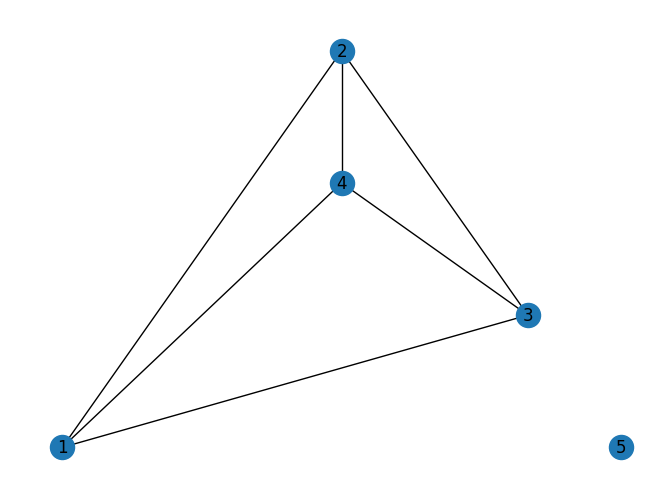

In [ ]:
# Отрисовываем граф в плоскости с метками вершин
nx.draw_planar(G, with_labels=True)

In [ ]:
# Получение базиса циклов графа G
list(nx.cycle_basis(G))

[[1, 2, 4], [3, 2, 4], [3, 1, 4]]

In [ ]:
# Вызов функции number_faces() для графа G
number_faces(G)

4

In [ ]:
# Количество ребер в планарном графе
G.number_of_edges()

6

In [ ]:
display('Cписок, содержащий среднее, медианное, минимальное и максимальное количество ребер на гранях графа G.')
[mean_number_face_edges(G), median_number_face_edges(G), min_number_face_edges(G), max_number_face_edges(G)]

'Cписок, содержащий среднее, медианное, минимальное и максимальное количество ребер на гранях графа G.'

[3.0, 3.0, 3, 3]

Работа с графами

In [1]:
import pandas as pd
from tqdm import tqdm

In [32]:
labels = ["Число вершин", "Число рёбер", "Диаметр", "Радиус", "Число компонент связности", "Цикломатическое число",
          "Максимальная степень вершины", "Минимальная степень вершины", "Среднее значение степеней вершин",
          "Медиана значений степеней вершин", "Мода значений степеней вершин", 'Хроматическое число', "Планарность",
          "Число граней", "Среднее значение числа рёбер в грани", "Медианное значение числа рёбер в грани",
          "Максимальное значение числа рёбер в грани", "Минимальное значение числа рёбер в грани", "Дерево", "Лес"]

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df = pd.DataFrame(np.nan, index=range(100000), columns=labels)

In [33]:
#Сохранение графов в файл
import base64
import zlib

In [ ]:
graphs = pd.DataFrame(np.nan, index = range(100000), columns = [0])

In [ ]:
#fp = open("text.txt", "w")
plan_counter = 0
nplan_counter = 0
pd.options.mode.chained_assignment = None
for i in tqdm(range(100000)):
    num_nodes = random.randint(1, 100) # Количество узлов
    edge_probability = random.random() # Вероятность создания ребра
    G = generate_random_graph(num_nodes, edge_probability)
    while encode_graph(G) in list(
                                  [0]):
        num_nodes = random.randint(1, 100) # Количество узлов
        edge_probability = random.random() # Вероятность создания ребра
        G = generate_random_graph(num_nodes, edge_probability)
    plan = is_planar(G)
    if plan:
        if plan_counter == 50000:
            while plan or (encode_graph(G) in list(graphs[0])):
                num_nodes = random.randint(1, 100) # Количество узлов
                edge_probability = random.random() # Вероятность создания ребра
                G = generate_random_graph(num_nodes, edge_probability)
                plan = is_planar(G)
            nplan_counter += 1
        else: plan_counter += 1
    else:
        if nplan_counter == 50000:
            while not plan or (encode_graph(G) in list(graphs[0])):
                num_nodes = random.randint(1, 100) # Количество узлов
                edge_probability = random.random() # Вероятность создания ребра
                G = generate_random_graph(num_nodes, edge_probability)
                plan = is_planar(G)
            plan_counter += 1
        else: nplan_counter += 1
#     filename = f"graph_{i}.png"
#     save_graph(G, filename)
    #print(f"Создан и сохранен граф: {filename}")

#     s = ""

#     s+= f"{num_nodes} {G.number_of_edges()}"
    graphs.iat[i, 0] = encode_graph(G)
    df["Число вершин"][i] = num_nodes
    df["Число рёбер"][i] = G.number_of_edges()

    diameter, radius = calculate_diameter_and_radius(G)
#     s += f" {diameter} {radius} "

    df["Диаметр"][i] = diameter
    df["Радиус"][i] = radius

    num_cc = number_connected_components(G)
    #s += f"{num_cc} "

    df["Число компонент связности"][i] = num_cc

    cyc_num = circuit_rank(G)
#     s += f"{cyc_num} "

    df["Цикломатическое число"][i] = cyc_num

    max_degree, min_degree, mean_degree, median_degree, mode_value = meaning_of_degrees(G)
    #print(f"Максимальная степень: {max_degree} \nМинимальная степень: {min_degree}\n"
    #      + f"Средняя степень: {mean_degree} \nМедианная степень: {median_degree}" +
    #     f"\nМода: {mode_value}")
    #s += f"{max_degree} {min_degree} {mean_degree} {median_degree} {mode_value} "

    df["Максимальная степень вершины"][i] = max_degree
    df["Минимальная степень вершины"][i] = min_degree
    df["Среднее значение степеней вершин"][i] = mean_degree
    df["Медиана значений степеней вершин"][i] = median_degree
    df["Мода значений степеней вершин"][i] = mode_value


    chromatic_number = len(set(calculate_chromatic_number(G).values()))
    #print(f"Хроматическое число графа: {chromatic_number}")
#     s += f"{chromatic_number} "

    df["Хроматическое число"][i] = chromatic_number


#     s += f"{plan}"

    df["Планарность"][i] = plan

    faces = number_faces(G)
#       s += f" {faces} "
    df["Число граней"][i] = faces

    mean_f = mean_number_face_edges(G)
    #       s += f"{mean_f} "
    df["Среднее значение числа рёбер в грани"][i] = mean_f

    median_f = median_number_face_edges(G)
    #       s += f"{median_f} "
    df["Медианное значение числа рёбер в грани"][i] = median_f

    mx_f = max_number_face_edges(G)
    #       s += f"{mx_f} "
    df["Максимальное значение числа рёбер в грани"][i] = mx_f

    mn_f = min_number_face_edges(G)
    #       s += f"{mn_f}"
    df["Минимальное значение числа рёбер в грани"][i] = mn_f

    #s += "\n"

    #fp.write(s)

#fp.close()

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:37:08<00:00, 17.16it/s]


In [ ]:
graphs.drop_duplicates().to_csv('data.csv', index=False, header=False)

In [39]:
graphs = pd.read_csv("data.csv", header=None, dtype=bytes)
graphs

,0
0,b'eJwzAAAAMQAx'
1,b'eJyNU9l1wCAM+2cKjRCbe//FmpgjCtC+/pFgWYfNBYHC...
2,b'eJyVWkm23DAI3OsUHMGapftf7NsamaRONnnJH9pFAUWB...
3,b'eJxVU9ERJSEI+6cKSlBB0P4buyTuu5ub2Q8XQwgBh1+f...
4,b'eJyVWUmS4zAMu/sVfIK1y///2MRSRHFVeqr61JVYMECC...
...,...
99995,b'eJwdj8kRBDEMAv8dhUKw7nH+iS3en4qCFhxztw7cPAnL...
99996,b'eJwdj8kBBEEIAv8VhSG0qH3kn9gy+xNFjkXGJIp8UaKi...
99997,b'eJwdkNsNBDEIA/+nCkrYEJ79N3bOScgyEBzwx7E6to5z...
99998,b'eJwlkNsNBCEMA/9dRUogL1j6b+wmnIR2SYLHhmWecvOy...


In [40]:
graphs.dtypes

0    object
dtype: object

In [53]:

df = pd.DataFrame(np.nan, index=range(len(graphs)), columns=labels)

for i in tqdm(range(len(graphs))):
    s = bytes(graphs.iat[i, 0][2:-1], encoding="ascii")
    G = decode_graph(s)
    df.loc[i, "Число вершин"] = G.number_of_nodes()
    df.loc[i, "Число рёбер"] = G.number_of_edges()

    diameter, radius = calculate_diameter_and_radius(G)
    df.loc[i, "Диаметр"] = diameter
    df.loc[i, "Радиус"] = radius

    num_cc = number_connected_components(G)
    df.loc[i, "Число компонент связности"] = num_cc

    cyc_num = circuit_rank(G)
    df.loc[i, "Цикломатическое число"] = cyc_num

    max_degree, min_degree, mean_degree, median_degree, mode_value = meaning_of_degrees(
        G)

    df.loc[i, "Максимальная степень вершины"] = max_degree
    df.loc[i, "Минимальная степень вершины"] = min_degree
    df.loc[i, "Среднее значение степеней вершин"] = mean_degree
    df.loc[i, "Медиана значений степеней вершин"] = median_degree
    df.loc[i, "Мода значений степеней вершин"] = mode_value

    chromatic_number = len(set(calculate_chromatic_number(G).values()))
    df.loc[i, "Хроматическое число"] = chromatic_number

    plan = is_planar(G)
    df.loc[i, "Планарность"] = plan

    faces = number_faces(G)
    df.loc[i, "Число граней"] = faces

    mean_f = mean_number_face_edges(G)
    df.loc[i, "Среднее значение числа рёбер в грани"] = mean_f

    median_f = median_number_face_edges(G)
    df.loc[i, "Медианное значение числа рёбер в грани"] = median_f

    mx_f = max_number_face_edges(G)
    df.loc[i, "Максимальное значение числа рёбер в грани"] = mx_f

    mn_f = min_number_face_edges(G)
    df.loc[i, "Минимальное значение числа рёбер в грани"] = mn_f

    tree = is_tree(G)
    df.loc[i, "Дерево"] = tree

    forest = is_forest(G)
    df.loc[i, "Лес"] = forest

  0%|          | 0/100000 [00:00<?, ?it/s]C:\Users\TeUm3\AppData\Local\Temp\ipykernel_15936\1573660474.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Планарность"] = plan
C:\Users\TeUm3\AppData\Local\Temp\ipykernel_15936\1573660474.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Дерево"] = tree
C:\Users\TeUm3\AppData\Local\Temp\ipykernel_15936\1573660474.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Лес"] 

100%|██████████| 100000/100000 [1:39:17<00:00, 16.79it/s]   


In [54]:
df

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность,Число граней,Среднее значение числа рёбер в грани,Медианное значение числа рёбер в грани,Максимальное значение числа рёбер в грани,Минимальное значение числа рёбер в грани,Дерево,Лес
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0,True,True
1,37.0,454.0,2.0,2.0,1.0,418.0,29.0,20.0,24.540541,25.0,26.0,16.0,False,419.0,2.167064,3.0,5.0,-436.0,False,False
2,98.0,3094.0,2.0,2.0,1.0,2997.0,73.0,53.0,63.142857,63.0,63.0,27.0,False,2998.0,2.064043,3.0,6.0,-3467.0,False,False
3,74.0,292.0,4.0,3.0,1.0,219.0,17.0,3.0,7.891892,8.0,8.0,6.0,False,220.0,2.654545,6.0,17.0,-844.0,False,False
4,83.0,2440.0,2.0,2.0,1.0,2358.0,68.0,50.0,58.795181,58.0,56.0,29.0,False,2359.0,2.068673,3.0,6.0,-2640.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,73.0,29.0,NaN,NaN,44.0,0.0,3.0,0.0,0.794521,1.0,1.0,2.0,True,1.0,58.000000,58.0,58.0,58.0,False,True
99996,64.0,26.0,NaN,NaN,38.0,0.0,3.0,0.0,0.812500,1.0,0.0,3.0,True,1.0,52.000000,52.0,52.0,52.0,False,True
99997,99.0,35.0,NaN,NaN,64.0,0.0,3.0,0.0,0.707071,1.0,0.0,3.0,True,1.0,70.000000,70.0,70.0,70.0,False,True
99998,62.0,65.0,NaN,NaN,10.0,13.0,6.0,0.0,2.096774,2.0,1.0,3.0,True,14.0,9.285714,7.0,37.0,3.0,False,False


Корреляция

In [ ]:
df.drop_duplicates(inplace = True)
for index, row in df.iterrows():
    if row["Планарность"] == 0:
        for col in ["Число граней", "Среднее значение числа рёбер в грани", "Медианное значение числа рёбер в грани",
                  "Максимальное значение числа рёбер в грани", "Минимальное значение числа рёбер в грани"]:
            df[col][index] = np.nan
df.isna().sum()

In [57]:
df

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность,Число граней,Среднее значение числа рёбер в грани,Медианное значение числа рёбер в грани,Максимальное значение числа рёбер в грани,Минимальное значение числа рёбер в грани,Дерево,Лес
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0,True,True
1,37.0,454.0,2.0,2.0,1.0,418.0,29.0,20.0,24.540541,25.0,26.0,16.0,False,NaN,NaN,NaN,NaN,NaN,False,False
2,98.0,3094.0,2.0,2.0,1.0,2997.0,73.0,53.0,63.142857,63.0,63.0,27.0,False,NaN,NaN,NaN,NaN,NaN,False,False
3,74.0,292.0,4.0,3.0,1.0,219.0,17.0,3.0,7.891892,8.0,8.0,6.0,False,NaN,NaN,NaN,NaN,NaN,False,False
4,83.0,2440.0,2.0,2.0,1.0,2358.0,68.0,50.0,58.795181,58.0,56.0,29.0,False,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8.0,11.0,3.0,2.0,1.0,4.0,4.0,1.0,2.750000,3.0,4.0,3.0,True,5.0,4.400000,4.0,7.0,3.0,False,False
99995,73.0,29.0,NaN,NaN,44.0,0.0,3.0,0.0,0.794521,1.0,1.0,2.0,True,1.0,58.000000,58.0,58.0,58.0,False,True
99997,99.0,35.0,NaN,NaN,64.0,0.0,3.0,0.0,0.707071,1.0,0.0,3.0,True,1.0,70.000000,70.0,70.0,70.0,False,True
99998,62.0,65.0,NaN,NaN,10.0,13.0,6.0,0.0,2.096774,2.0,1.0,3.0,True,14.0,9.285714,7.0,37.0,3.0,False,False


In [ ]:
plan_df = df[df["Планарность"] == 1]
plan_df

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность,Число граней,Среднее значение числа рёбер в грани,Медианное значение числа рёбер в грани,Максимальное значение числа рёбер в грани,Минимальное значение числа рёбер в грани
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0
21,6.0,5.0,4.0,2.0,1.0,0.0,3.0,1.0,1.666667,2.0,1.0,2.0,True,1.0,10.000000,10.0,10.0,10.0
25,17.0,18.0,2.0,2.0,3.0,4.0,6.0,0.0,2.117647,2.0,2.0,3.0,True,5.0,7.200000,5.0,20.0,3.0
34,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0
47,31.0,5.0,2.0,2.0,26.0,0.0,2.0,0.0,0.322581,0.0,0.0,2.0,True,1.0,10.000000,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,62.0,48.0,2.0,2.0,19.0,5.0,5.0,0.0,1.548387,1.0,1.0,3.0,True,6.0,16.000000,7.0,59.0,5.0
99995,73.0,29.0,2.0,2.0,44.0,0.0,3.0,0.0,0.794521,1.0,1.0,2.0,True,1.0,58.000000,58.0,58.0,58.0
99997,99.0,35.0,2.0,2.0,64.0,0.0,3.0,0.0,0.707071,1.0,0.0,3.0,True,1.0,70.000000,70.0,70.0,70.0
99998,62.0,65.0,2.0,2.0,10.0,13.0,6.0,0.0,2.096774,2.0,1.0,4.0,True,14.0,9.285714,7.0,35.0,3.0


In [ ]:
ne_plan = df[df["Планарность"] == 0].drop(["Число граней", "Среднее значение числа рёбер в грани", "Медианное значение числа рёбер в грани",
                  "Максимальное значение числа рёбер в грани", "Минимальное значение числа рёбер в грани"], axis=1)
ne_plan

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность
1,37.0,454.0,2.0,2.0,1.0,418.0,29.0,20.0,24.540541,25.0,26.0,14.0,False
2,98.0,3094.0,2.0,2.0,1.0,2997.0,73.0,53.0,63.142857,63.0,63.0,26.0,False
3,74.0,292.0,4.0,3.0,1.0,219.0,17.0,3.0,7.891892,8.0,8.0,7.0,False
4,83.0,2440.0,2.0,2.0,1.0,2358.0,68.0,50.0,58.795181,58.0,56.0,28.0,False
5,69.0,1961.0,2.0,2.0,1.0,1893.0,64.0,50.0,56.840580,57.0,55.0,31.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55047,71.0,288.0,4.0,3.0,1.0,218.0,14.0,3.0,8.112676,8.0,9.0,7.0,False
55048,45.0,597.0,2.0,2.0,1.0,553.0,35.0,21.0,26.533333,27.0,26.0,14.0,False
55049,82.0,1276.0,2.0,2.0,1.0,1195.0,39.0,23.0,31.121951,32.0,32.0,14.0,False
55050,35.0,229.0,3.0,2.0,1.0,195.0,19.0,6.0,13.085714,12.0,12.0,9.0,False


In [9]:
df.to_csv("graph_specs.csv", encoding = "utf-8-sig", index = False)

In [10]:
df = pd.read_csv("graph_specs.csv")

In [19]:
plan_df.to_csv("plan_graph_specs.csv", encoding = "utf-8-sig", index = False)

In [20]:
ne_plan.to_csv("no_plan_graph_specs.csv", encoding = "utf-8-sig", index = False)

In [59]:
# Импорт библиотеку seaborn для визуализации данных.
import seaborn as sb

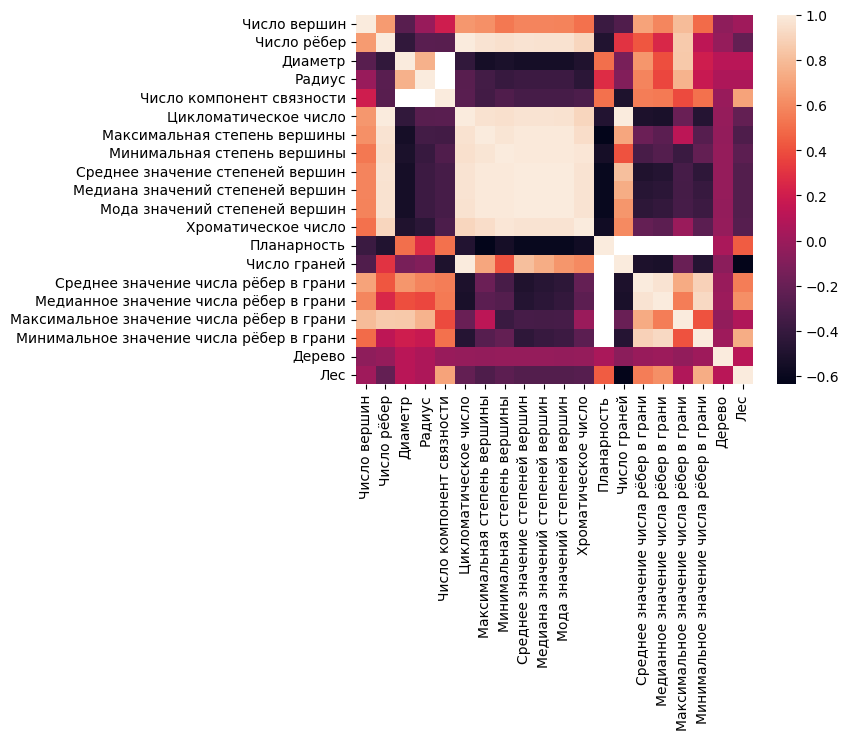

In [62]:
# Построение матрицы корреляций
dataplot=sb.heatmap(df.corr())

In [ ]:
# Сохранение корреляций в файл Excel
df.corr().to_excel("output.xlsx")

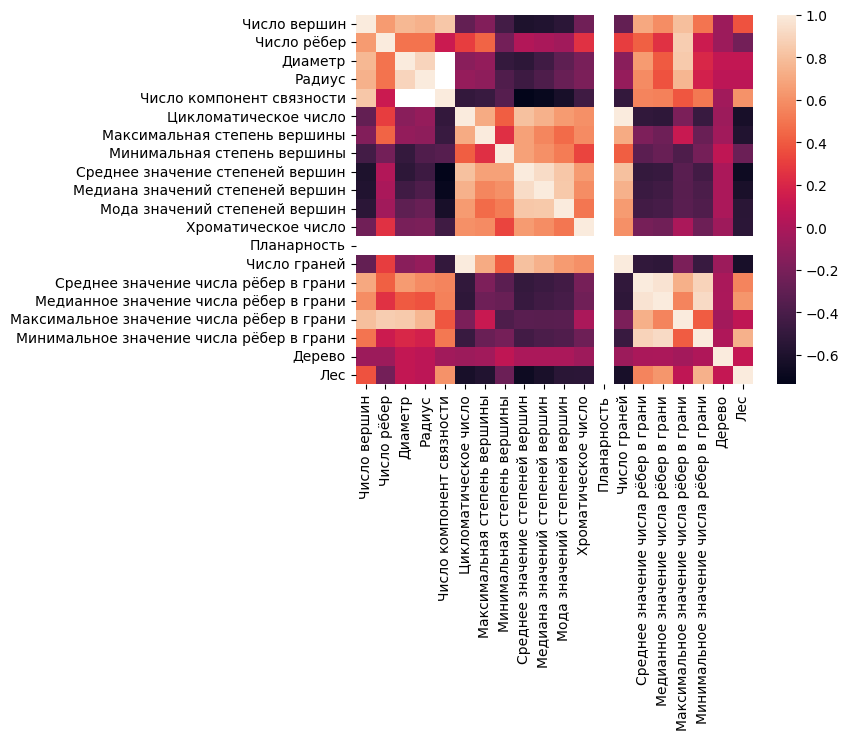

In [63]:
# Corr для планарных графов
dataplot=sb.heatmap(df[df["Планарность"] == 1].corr())

In [ ]:
# Сохранение корреляций в файл Excel
df[(df["Планарность"] == 1) & (df["Число компонент связности"] == 1)].corr().to_excel("output_plan.xlsx")


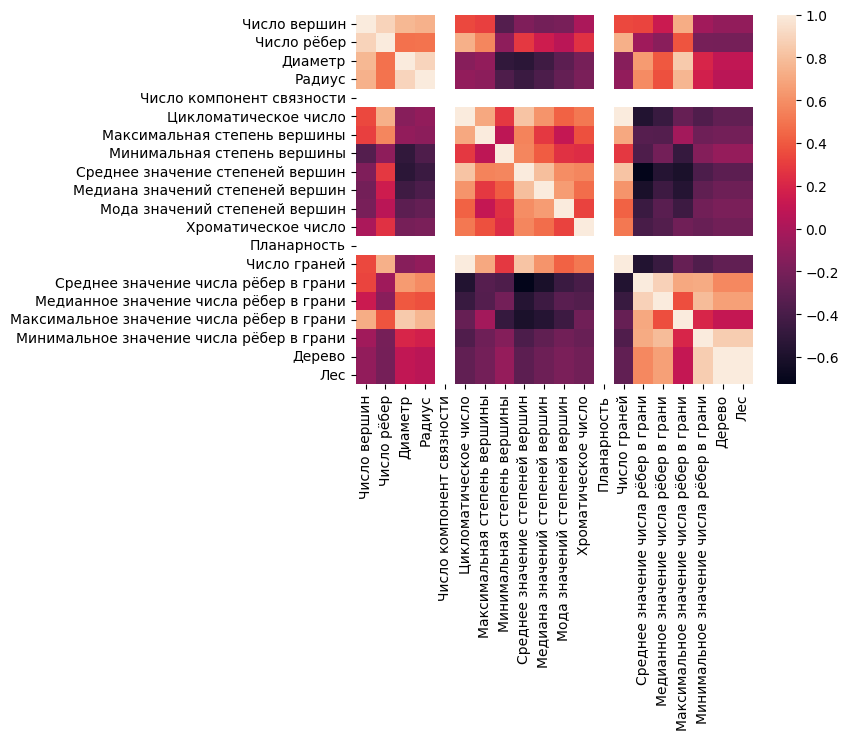

In [64]:
# Корреляция для планарных графов c 1 компонентой связности
dataplot=sb.heatmap(df[(df["Планарность"] == 1) & (df["Число компонент связности"] == 1)].corr())

## Вычисление

In [21]:
# Читаем CSV-файл с планарными графами "plan_graph_specs.csv"
plan_df = pd.read_csv("plan_graph_specs.csv")

# Отображаем датафрейм
plan_df

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность,Число граней,Среднее значение числа рёбер в грани,Медианное значение числа рёбер в грани,Максимальное значение числа рёбер в грани,Минимальное значение числа рёбер в грани
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0
1,6.0,5.0,4.0,2.0,1.0,0.0,3.0,1.0,1.666667,2.0,1.0,2.0,True,1.0,10.000000,10.0,10.0,10.0
2,17.0,18.0,2.0,2.0,3.0,4.0,6.0,0.0,2.117647,2.0,2.0,3.0,True,5.0,7.200000,5.0,20.0,3.0
3,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,True,1.0,0.000000,0.0,0.0,0.0
4,31.0,5.0,2.0,2.0,26.0,0.0,2.0,0.0,0.322581,0.0,0.0,2.0,True,1.0,10.000000,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28197,62.0,48.0,2.0,2.0,19.0,5.0,5.0,0.0,1.548387,1.0,1.0,3.0,True,6.0,16.000000,7.0,59.0,5.0
28198,73.0,29.0,2.0,2.0,44.0,0.0,3.0,0.0,0.794521,1.0,1.0,2.0,True,1.0,58.000000,58.0,58.0,58.0
28199,99.0,35.0,2.0,2.0,64.0,0.0,3.0,0.0,0.707071,1.0,0.0,3.0,True,1.0,70.000000,70.0,70.0,70.0
28200,62.0,65.0,2.0,2.0,10.0,13.0,6.0,0.0,2.096774,2.0,1.0,4.0,True,14.0,9.285714,7.0,35.0,3.0


In [22]:
# Чтение данных по непланарным графам из файла "no_plan_graph_specs.csv"
ne_plan = pd.read_csv("no_plan_graph_specs.csv")
ne_plan

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность
0,37.0,454.0,2.0,2.0,1.0,418.0,29.0,20.0,24.540541,25.0,26.0,14.0,False
1,98.0,3094.0,2.0,2.0,1.0,2997.0,73.0,53.0,63.142857,63.0,63.0,26.0,False
2,74.0,292.0,4.0,3.0,1.0,219.0,17.0,3.0,7.891892,8.0,8.0,7.0,False
3,83.0,2440.0,2.0,2.0,1.0,2358.0,68.0,50.0,58.795181,58.0,56.0,28.0,False
4,69.0,1961.0,2.0,2.0,1.0,1893.0,64.0,50.0,56.840580,57.0,55.0,31.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49376,71.0,288.0,4.0,3.0,1.0,218.0,14.0,3.0,8.112676,8.0,9.0,7.0,False
49377,45.0,597.0,2.0,2.0,1.0,553.0,35.0,21.0,26.533333,27.0,26.0,14.0,False
49378,82.0,1276.0,2.0,2.0,1.0,1195.0,39.0,23.0,31.121951,32.0,32.0,14.0,False
49379,35.0,229.0,3.0,2.0,1.0,195.0,19.0,6.0,13.085714,12.0,12.0,9.0,False


In [ ]:
# ML TIMEEEEEEEE

# Импорт необходимых модулей
from sklearn.model_selection import train_test_split  # Модуль для разделения данных на обучающую и тестовую выборки
from sklearn.linear_model import LinearRegression  # Модуль для линейной регрессии


In [ ]:
# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(plan_df, test_size=0.2)
train.shape, test.shape

((22561, 18), (5641, 18))

In [ ]:
# models = pd.DataFrame(np.nan, index = range(18), columns = ["Model"])


In [ ]:
# Создаем пустой DataFrame для хранения весов линейных моделей
linear_models_weights = pd.DataFrame()

# Цикл для обучения линейных моделей для каждого признака
for i in range(18):
    # Выбираем текущий признак
    col = labels[i]

    # Удаляем текущий признак и "Цикломатическое число" из тренировочного набора данных
    X_train = train.drop([col, "Цикломатическое число"], axis=1)

    # Создаем и обучаем линейную модель
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, train[col])

    # Создаем DataFrame с весами текущей модели
    indices = X_train.columns
    indices = indices.append(pd.Index(["Свободный член"]))
    present = pd.DataFrame(
        [*model.coef_.round(), model.intercept_], index=indices, columns=[col])

    # Добавляем веса текущей модели в общий DataFrame
    linear_models_weights = (
        present.T.reindex(columns=[*labels, "Свободный член"])
        if linear_models_weights.empty
        else pd.concat([linear_models_weights, present.T]))

    # Выводим ненулевые веса текущей модели
    display(present[present[col] != 0])


,Число вершин
Число рёбер,1.0
Число компонент связности,1.0
Число граней,-1.0
Свободный член,1.0


,Число рёбер
Число вершин,1.0
Число компонент связности,-1.0
Число граней,1.0
Свободный член,-1.0


,Диаметр
Число вершин,4.655449e+09
Число рёбер,-4.655449e+09
Радиус,2.000000e+00
Число компонент связности,-4.655449e+09
Планарность,1.535473e+06
Число граней,4.655449e+09
Свободный член,-4.656985e+09


,Радиус
Число вершин,-1.030102e+09
Число рёбер,1.030102e+09
Число компонент связности,1.030102e+09
Планарность,-7.677320e+05
Число граней,-1.030102e+09
Свободный член,1.030870e+09


,Число компонент связности
Число вершин,1.0
Число рёбер,-1.0
Число граней,1.0
Свободный член,-1.0


,Цикломатическое число
Число граней,1.000000
Свободный член,-0.999982


,Максимальная степень вершины
Число вершин,4.797280e+09
Число рёбер,-4.797280e+09
Число компонент связности,-4.797280e+09
Среднее значение степеней вершин,1.000000e+00
Планарность,2.027686e+06
Число граней,4.797280e+09
Свободный член,-4.799308e+09


,Минимальная степень вершины
Число вершин,1.166273e+10
Число рёбер,-1.166273e+10
Число компонент связности,-1.166273e+10
Среднее значение степеней вершин,1.000000e+00
Планарность,4.186940e+05
Число граней,1.166273e+10
Свободный член,-1.166315e+10


,Среднее значение степеней вершин
Число вершин,-2.664909e+09
Число рёбер,2.664909e+09
Число компонент связности,2.664909e+09
Планарность,-2.232040e+05
Число граней,-2.664909e+09
Свободный член,2.665132e+09


,Медиана значений степеней вершин
Число вершин,8.112513e+09
Число рёбер,-8.112513e+09
Число компонент связности,-8.112513e+09
Среднее значение степеней вершин,1.000000e+00
Планарность,-2.548388e+06
Число граней,8.112513e+09
Свободный член,-8.109965e+09


,Мода значений степеней вершин
Число вершин,-4.630115e+09
Число рёбер,4.630115e+09
Число компонент связности,4.630115e+09
Среднее значение степеней вершин,1.000000e+00
Планарность,-3.676924e+06
Число граней,-4.630115e+09
Свободный член,4.633792e+09


,Хроматическое число
Число вершин,-3.006179e+10
Число рёбер,3.006179e+10
Число компонент связности,3.006179e+10
Планарность,3.028680e+07
Число граней,-3.006179e+10
Свободный член,3.003150e+10


,Планарность
Свободный член,1.0


,Число граней
Число вершин,-1.0
Число рёбер,1.0
Число компонент связности,1.0
Свободный член,1.0


,Среднее значение числа рёбер в грани
Число вершин,-4.738966e+10
Число рёбер,4.738966e+10
Радиус,1.000000e+00
Число компонент связности,4.738966e+10
Среднее значение степеней вершин,2.000000e+00
Планарность,-1.480194e+07
Число граней,-4.738966e+10
Свободный член,4.740446e+10


,Медианное значение числа рёбер в грани
Число вершин,3.228229e+10
Число рёбер,-3.228229e+10
Радиус,-1.000000e+00
Число компонент связности,-3.228229e+10
Минимальная степень вершины,1.000000e+00
Среднее значение степеней вершин,-3.000000e+00
Планарность,1.247447e+07
Число граней,3.228229e+10
Среднее значение числа рёбер в грани,2.000000e+00
Свободный член,-3.229477e+10


,Максимальное значение числа рёбер в грани
Число вершин,2.503844e+11
Число рёбер,-2.503844e+11
Радиус,-1.000000e+00
Число компонент связности,-2.503844e+11
Среднее значение степеней вершин,1.000000e+00
Хроматическое число,1.000000e+00
Планарность,3.974765e+06
Число граней,2.503844e+11
Среднее значение числа рёбер в грани,1.000000e+00
Медианное значение числа рёбер в грани,-1.000000e+00


,Минимальное значение числа рёбер в грани
Число вершин,1.668408e+11
Число рёбер,-1.668408e+11
Диаметр,1.000000e+00
Радиус,-2.000000e+00
Число компонент связности,-1.668408e+11
Минимальная степень вершины,1.000000e+00
Среднее значение степеней вершин,-5.000000e+00
Медиана значений степеней вершин,1.000000e+00
Планарность,5.251095e+07
Число граней,1.668408e+11


In [ ]:
linear_models_weights

,Число вершин,Число рёбер,Диаметр,Радиус,Число компонент связности,Цикломатическое число,Максимальная степень вершины,Минимальная степень вершины,Среднее значение степеней вершин,Медиана значений степеней вершин,Мода значений степеней вершин,Хроматическое число,Планарность,Число граней,Среднее значение числа рёбер в грани,Медианное значение числа рёбер в грани,Максимальное значение числа рёбер в грани,Минимальное значение числа рёбер в грани,Свободный член
Число вершин,NaN,1.000000e+00,-0.0,0.0,1.000000e+00,NaN,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-1.000000e+00,-0.0,-0.0,0.0,0.0,1.000000e+00
Число рёбер,1.000000e+00,NaN,0.0,-0.0,-1.000000e+00,NaN,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,1.000000e+00,0.0,-0.0,0.0,-0.0,-1.000000e+00
Диаметр,4.655449e+09,-4.655449e+09,NaN,2.0,-4.655449e+09,NaN,0.0,0.0,0.0,-0.0,0.0,-0.0,1535473.0,4.655449e+09,-0.0,0.0,0.0,0.0,-4.656985e+09
Радиус,-1.030102e+09,1.030102e+09,0.0,NaN,1.030102e+09,NaN,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-767732.0,-1.030102e+09,0.0,-0.0,-0.0,-0.0,1.030870e+09
Число компонент связности,1.000000e+00,-1.000000e+00,0.0,0.0,NaN,NaN,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.000000e+00,0.0,-0.0,0.0,0.0,-1.000000e+00
Цикломатическое число,0.000000e+00,-0.000000e+00,0.0,-0.0,-0.000000e+00,NaN,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.000000e+00,0.0,0.0,0.0,0.0,-9.999820e-01
Максимальная степень вершины,4.797280e+09,-4.797280e+09,0.0,-0.0,-4.797280e+09,NaN,NaN,-0.0,1.0,-0.0,-0.0,0.0,2027686.0,4.797280e+09,0.0,-0.0,0.0,-0.0,-4.799308e+09
Минимальная степень вершины,1.166273e+10,-1.166273e+10,0.0,-0.0,-1.166273e+10,NaN,-0.0,NaN,1.0,-0.0,-0.0,-0.0,418694.0,1.166273e+10,-0.0,0.0,0.0,0.0,-1.166315e+10
Среднее значение степеней вершин,-2.664909e+09,2.664909e+09,0.0,-0.0,2.664909e+09,NaN,0.0,0.0,NaN,0.0,0.0,0.0,-223204.0,-2.664909e+09,0.0,-0.0,0.0,-0.0,2.665132e+09
Медиана значений степеней вершин,8.112513e+09,-8.112513e+09,-0.0,0.0,-8.112513e+09,NaN,-0.0,-0.0,1.0,NaN,0.0,0.0,-2548388.0,8.112513e+09,-0.0,0.0,-0.0,0.0,-8.109965e+09


## Формула Эйлера

Как известно, для планарного графа выполняется формула Эйлера:

$$V - E + F = C + 1,$$

где $V$ - число вершин, $E$ - число рёбер, $F$ - число граней, $C$ - число компонент связности.

Выведем получившиеся значения коэффициентов после обучения линейной модели:

In [ ]:
# Получение коэффициентов линейной модели из DataFrame linear_models_weights для "Число вершин"
linear_models_weights.loc["Число вершин"]

Число вершин                                 NaN
Число рёбер                                  1.0
Диаметр                                     -0.0
Радиус                                       0.0
Число компонент связности                    1.0
Цикломатическое число                        NaN
Максимальная степень вершины                 0.0
Минимальная степень вершины                  0.0
Среднее значение степеней вершин             0.0
Медиана значений степеней вершин             0.0
Мода значений степеней вершин               -0.0
Хроматическое число                         -0.0
Планарность                                  0.0
Число граней                                -1.0
Среднее значение числа рёбер в грани        -0.0
Медианное значение числа рёбер в грани      -0.0
Максимальное значение числа рёбер в грани    0.0
Минимальное значение числа рёбер в грани     0.0
Свободный член                               1.0
Name: Число вершин, dtype: float64

Мы получили формулу:

$$V = E + C - F + 1.$$

Сделав несколько школьных преобразований, получим:

$$V - E + F = C + 1,$$

что и является формулой Эйлера для планарного графа.

In [ ]:
linear_models_weights.loc["Цикломатическое число"]

Число вершин                                 0.000000
Число рёбер                                 -0.000000
Диаметр                                      0.000000
Радиус                                      -0.000000
Число компонент связности                   -0.000000
Цикломатическое число                             NaN
Максимальная степень вершины                -0.000000
Минимальная степень вершины                 -0.000000
Среднее значение степеней вершин            -0.000000
Медиана значений степеней вершин             0.000000
Мода значений степеней вершин               -0.000000
Хроматическое число                          0.000000
Планарность                                 -0.000000
Число граней                                 1.000000
Среднее значение числа рёбер в грани         0.000000
Медианное значение числа рёбер в грани       0.000000
Максимальное значение числа рёбер в грани    0.000000
Минимальное значение числа рёбер в грани     0.000000
Свободный член              

Тесты

In [ ]:
print(list(nx.generate_adjlist(G)))

In [ ]:
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)
filename = f"graph_{1}.png"
save_graph(G, filename)
print(f"Создан и сохранен граф: {filename}")
degrees = [(node, val) for (node, val) in G.degree()]
print(degrees)

In [ ]:
G = nx.path_graph(5)
nx.draw_planar(G)